### Dataset: Factors affecting campus placement

Preguntas: 
1. Qué factor afecta que los alumnos encuentren trabajo al terminar los estudios?
2. Es importante la nota para encontrar trabajo?
3. Que especializacion es más demanda por las empresas?
4. Qué tan importante es la experiencia para encontrar trabajo?
5. Qué factores afectan el salario? 

Analisis propuesto:
1. Predicción de si un alumno va a obtener o no una oferta de trabajo
2. Predicción del salario estimado


variables del dataset: 
- sl_no : serial number 
- gender: genero (cualitativa)
- ssc_p : secondary education percentage (cuantitativa)
- ssc_b : board of secondary education (cualitativa)
- hsc_p : high education percentage (cuantitativa)
- hsc_b : board of high education (cualitativa)
- hsc_s : high education spezialization (cualitativa)
- degree_p : degree percentage (cuantitativa)
- degree_t : degree type (cualitativa)
- workex : working experience (cualitativa)
- etest_p: employability test percentage (cuantitativa)
- specialization: post degree specialization (cualitativa)
- mba_p : mba percentage (cuantitativa)
- status: placed / not placed (cualitativa)
- salary: salaty offered (cuantitativa)

#### Librerias y funciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import printPlots as pp

#### Carga dataset

In [2]:
#kaggle datasets download -d benroshan/factors-affecting-campus-placement -f Placement_Data_Full_Class.csv 
dataframe=pd.read_csv('Placement_Data_Full_Class.csv')
dataframe.drop(labels='sl_no', axis=1, inplace=True) 

### Analisis Exploratorio

In [3]:
dataframe.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
dataframe.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

*Los 67 Nan se corresponden con los alumnos que no obtuvieron plaza*

In [5]:
dataframe.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

*En la poblacion obtuvieron trabajo el doble de los que no*

In [6]:
dataframe.salary.describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

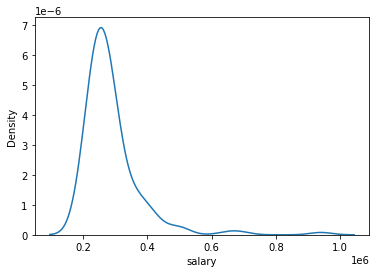

In [7]:
sns.kdeplot('salary', data = dataframe); 

Idea: *Si eliminamos los salarios por encima de 50k podriamos quedarnos con una distribucion normal del salario; de 30k hacia abajo tenemos al 75% de la población*

#### ¿Qué variables afectan a la hora de obtener trabajo? ¿Y al salario?

**1. Genero**

In [8]:
dataframe.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

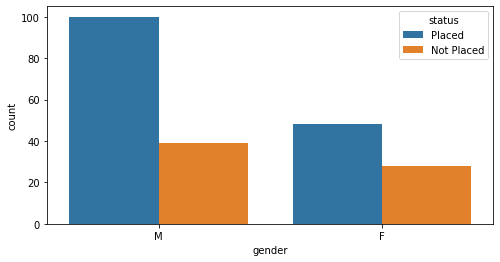

In [9]:
pp.print_status('gender', dataframe)

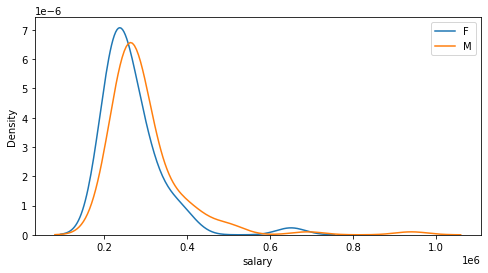

In [10]:
pp.print_salary('gender', dataframe)

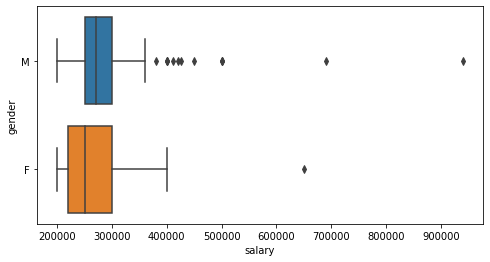

In [11]:
pp.print_salary_boxplot('gender', dataframe)

Conclusiones:
   - Hay casi el doble de hombres que de mujeres en el dataset
   - En proporcion, los hombres obtienen mas plazas
   - El salario en media es superior en hombres y tienen mas outliers con grandes sueldos  

**2. Experiencia**

In [12]:
dataframe.workex.value_counts()

No     141
Yes     74
Name: workex, dtype: int64

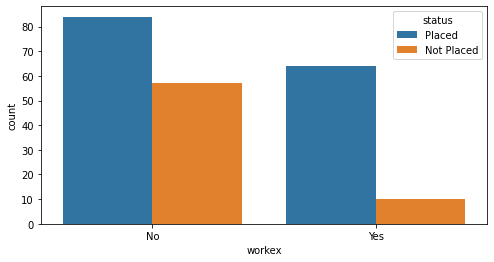

In [13]:
pp.print_status('workex', dataframe)

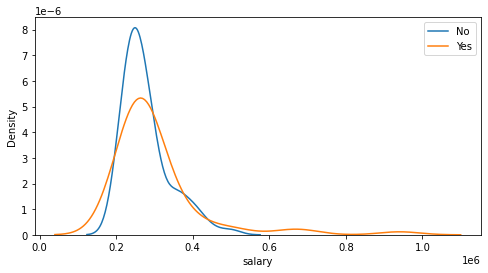

In [14]:
pp.print_salary('workex', dataframe)

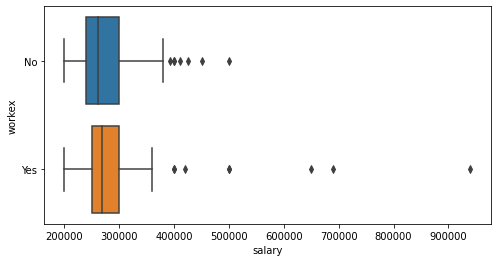

In [15]:
pp.print_salary_boxplot('workex', dataframe)

Conlusiones:
- El doble de alumnos sin experiencia que con ella 
- Muy pocos alumnos con experencia no obtuvieron plaza
- El salario no parece verse afectado

**3. Grado (tipo y nota)**

In [16]:
dataframe.degree_t.value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

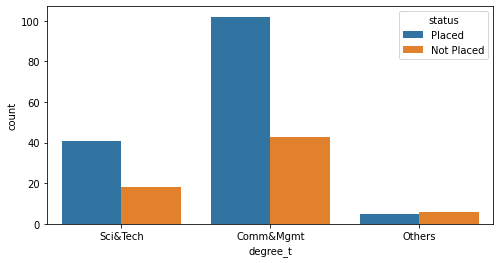

In [17]:
pp.print_status('degree_t', dataframe)

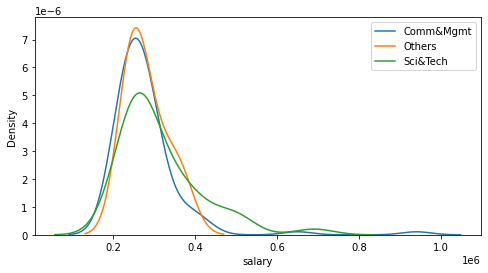

In [18]:
pp.print_salary('degree_t', dataframe)

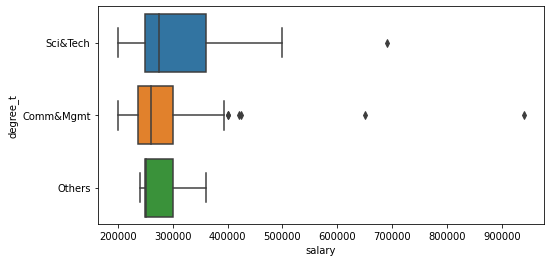

In [19]:
pp.print_salary_boxplot('degree_t', dataframe)

In [20]:
dataframe.degree_p.describe()

count    215.000000
mean      66.370186
std        7.358743
min       50.000000
25%       61.000000
50%       66.000000
75%       72.000000
max       91.000000
Name: degree_p, dtype: float64

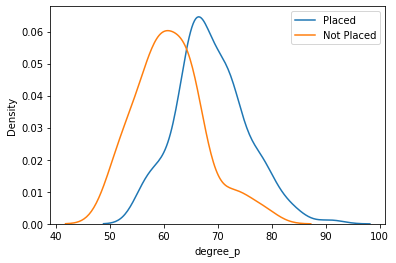

In [21]:
pp.print_status_kernel('degree_p', dataframe)

<Figure size 576x288 with 0 Axes>

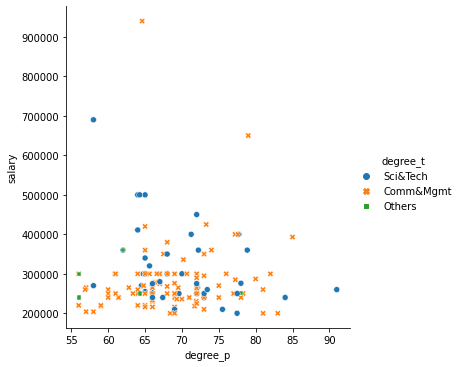

In [22]:
pp.print_salary_scatter('degree_p', dataframe, 'degree_t')

Conclusiones: 
 - La mayoria de los alumnos son de commerce and managment.
 - Ni el estatus ni el salario se ven muy afectados por el tipo de grado; un poco superior el salario en science and tech.
 - Las notas si tienen importancia en el status; los que tienen plaza se situan entorno al 7 y los que no entorno al 6.
 - El salario no presenta ningun tipo  de correlacion con la nota

**4. Educación secundaria (consejo y nota)**

In [23]:
dataframe.ssc_b.value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

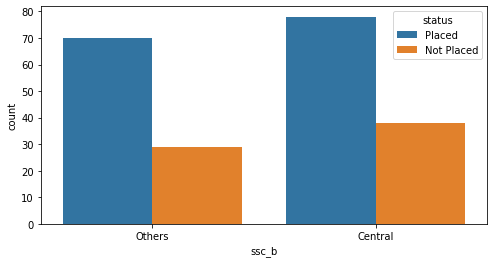

In [24]:
pp.print_status('ssc_b', dataframe)

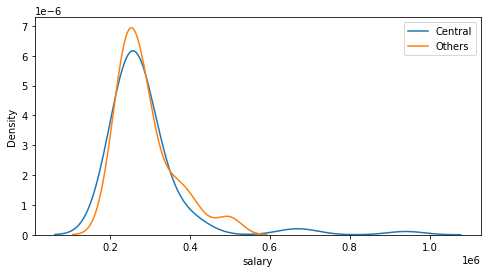

In [25]:
pp.print_salary('ssc_b', dataframe)

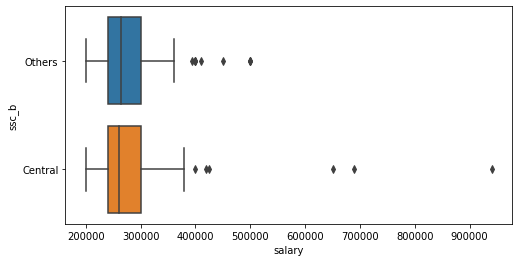

In [26]:
pp.print_salary_boxplot('ssc_b', dataframe)

In [27]:
dataframe.ssc_p.describe()

count    215.000000
mean      67.303395
std       10.827205
min       40.890000
25%       60.600000
50%       67.000000
75%       75.700000
max       89.400000
Name: ssc_p, dtype: float64

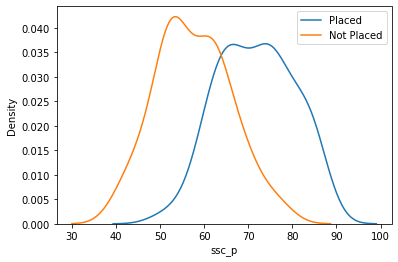

In [28]:
pp.print_status_kernel('ssc_p', dataframe)

<Figure size 576x288 with 0 Axes>

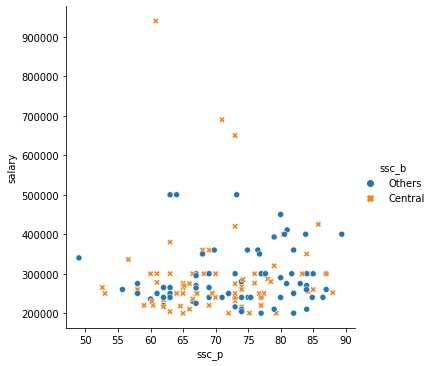

In [29]:
pp.print_salary_scatter('ssc_p', dataframe, 'ssc_b')

Conclusiones:
- El consejo no parece tener ningun efecto sobre el estatus o el salario; unicamente destacar que los ('muy') outliers son de las consejos del centro.
- En cuanto a la nota, si tiene un efecto sobre el estatus, los que tienen plaza tienen notas entorno al 7.5 y los que no tienen plaza entorno al 5, 5.5.
- El salario no parece tener una correlacion con la nota

**5. Educación superior (consejo, nota y especializacion)**

In [30]:
dataframe.hsc_b.value_counts()

Others     131
Central     84
Name: hsc_b, dtype: int64

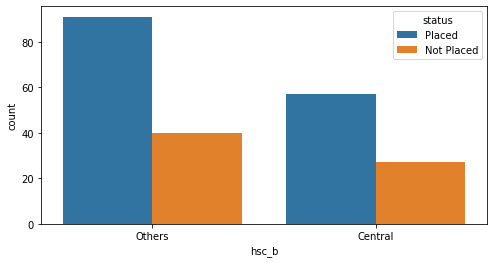

In [31]:
pp.print_status('hsc_b', dataframe)

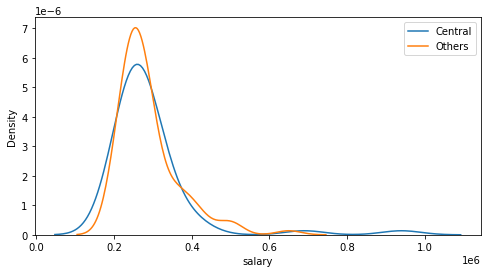

In [32]:
pp.print_salary('hsc_b', dataframe)

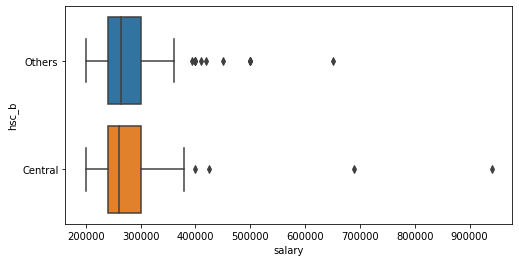

In [33]:
pp.print_salary_boxplot('hsc_b', dataframe)

In [34]:
dataframe.hsc_s.value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

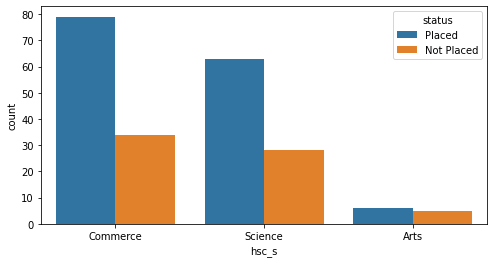

In [35]:
pp.print_status('hsc_s', dataframe)

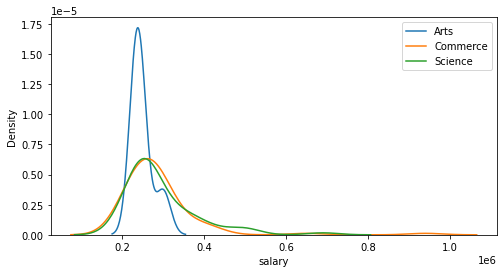

In [36]:
pp.print_salary('hsc_s', dataframe)

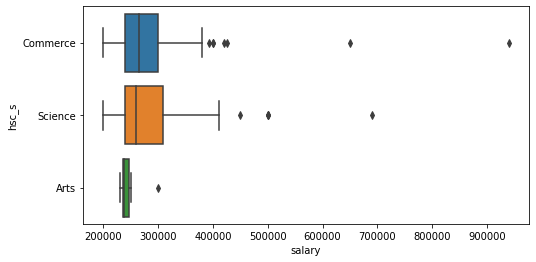

In [37]:
pp.print_salary_boxplot('hsc_s', dataframe)

In [38]:
dataframe.hsc_p.describe()

count    215.000000
mean      66.333163
std       10.897509
min       37.000000
25%       60.900000
50%       65.000000
75%       73.000000
max       97.700000
Name: hsc_p, dtype: float64

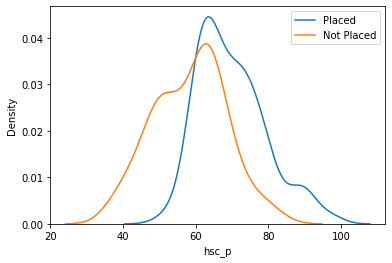

In [39]:
pp.print_status_kernel('hsc_p', dataframe)

<Figure size 576x288 with 0 Axes>

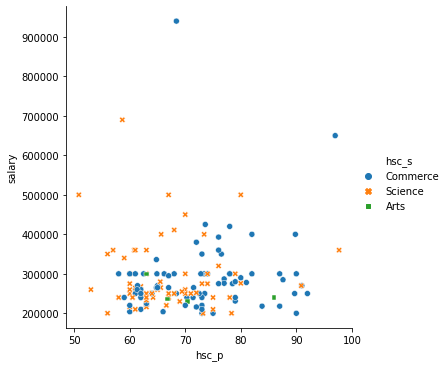

In [40]:
pp.print_salary_scatter('hsc_p', dataframe, 'hsc_s')

Conlusiones:
- Al igual que con la educacion secundaria, el consejo no tiene efecto apenas sobre el estatus ni tampoco el salario.
- La especializacion tampoco parece tener mucho efecto sobre el estatus; si bien es cierto que artes si que estaria peor, la muestra de alumnos de artes es muy pequeña como para poder hacer conclusiones claras; y con el salario pasa algo parecido
- Las notas si parecen tener un efecto sobre el estatus, los que tienen plaza tienen mayores notas; pero al igual que antes, no parece tner correlacion con el salario

**6. Especializacion post grado**

In [41]:
dataframe.specialisation.value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

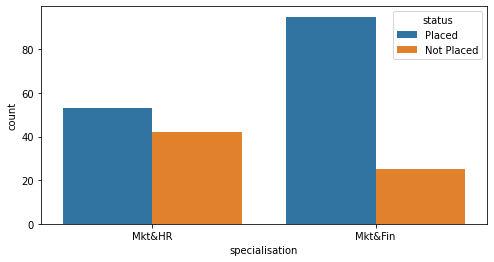

In [42]:
pp.print_status('specialisation', dataframe)

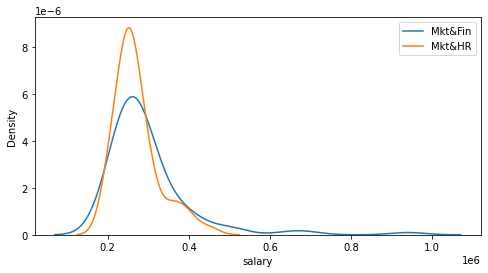

In [43]:
pp.print_salary('specialisation', dataframe)

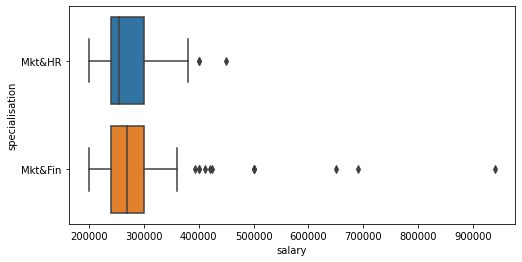

In [44]:
pp.print_salary_boxplot('specialisation', dataframe)

Conclusiones:
- La especializacion tiene efecto sobre el estatus; el postgrado marketing y finanzas tiene un ratio mucho mejor en contratados
- En cuanto al salario, no parece existir mucha diferencia, eso si, los grandes outliers son el postgrado de marketing y finanzas

**7. Nota del MBA**

In [45]:
dataframe.mba_p.describe()

count    215.000000
mean      62.278186
std        5.833385
min       51.210000
25%       57.945000
50%       62.000000
75%       66.255000
max       77.890000
Name: mba_p, dtype: float64

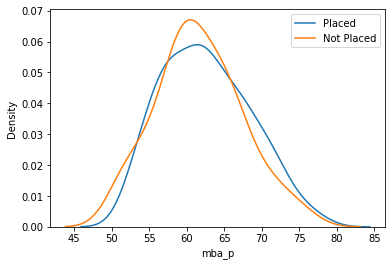

In [46]:
pp.print_status_kernel('mba_p', dataframe)

<Figure size 576x288 with 0 Axes>

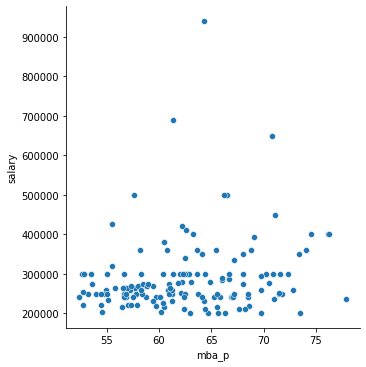

In [47]:
pp.print_salary_scatter('mba_p', dataframe)

Conclusiones: 
- La nota del MBA no parece tener efecto ni el estatus sin el salario

**8. Nota del test de empleabilidad**

In [48]:
dataframe.etest_p.describe()

count    215.000000
mean      72.100558
std       13.275956
min       50.000000
25%       60.000000
50%       71.000000
75%       83.500000
max       98.000000
Name: etest_p, dtype: float64

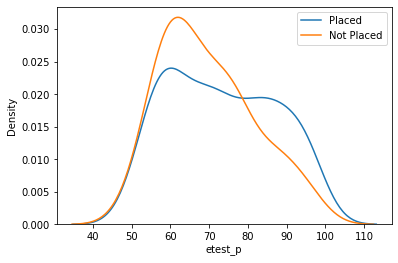

In [49]:
pp.print_status_kernel('etest_p', dataframe)

<Figure size 576x288 with 0 Axes>

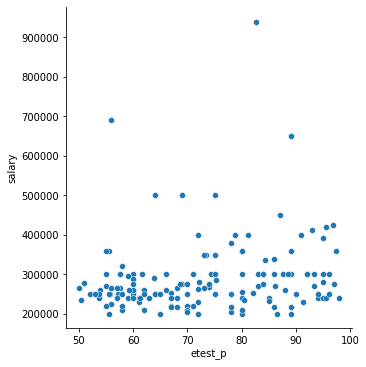

In [50]:
pp.print_salary_scatter('etest_p', dataframe)

Conclusiones: 
- La nota si que parece tener algo de efecto sobre el estatus, pero no parece existir correlacion con el salario.

**CONCLUSIONES FINALES:** 

 1. Los outliers del salario podrian sesgar muchos las estimaciones de la prediccion
2. Tener en cuenta con el clasificador que mucha poblacion obtuvo trabajo
3. Las variables que mas parecen afectar al estatus son el genero(gender), la experiencia(workex), la nota del grado(degree_p), la nota de la educacion secundaria (ssc_p), la especializacion en la secundaria (teniendo muy encuenta que la poblacion de artes es muy pequeña) (hsc_s), la nota de secundaria (hsc_p), especializacion postgrado (specialisation), la nota del test de empleabilidad (etest_p).
4. Las variables que parecen afectar al salario son el genero(gender), ligeramente el tipo de grado(degree_t), la especializacion en secundaria (pero con el mismo cuidado que con el estatus) (hsc_s).
5. Si bien es estatus si parece tener relacion con las variables del dataset, sobre todo con las notas con el genero y con la experiencia; el salario parece ser un elemento más aleatorio dentro del rango 20k-40k. Esto puede deberse a que esos primeros puestos despues de la educación tienden a tener unos salarios 'estandar' o a que las variables del dataset no son suficientes como para explicar los salario, otras variables como las empresas donde se realizo la experiencia laboral, la habilidad de los alumnos en las entrevistas u otras mas representen mejor el salario.


Clasificacion: Status | Regresion: Salary
:--------: | -------
gender | gender
workex | degree_t
degree_p | hsc_s
ssc_p
hsc_s
hsc_p
etest_p

### Problema de Clasifiacion (binaria): Predecir si un alumno obtendrá una plaza o no. 

Para el problema de clasificación debemos quitar del dataset la variable salary, ya que esa sería una variable que podría tener un valor una vez el resultado de status fuera 'placed'. 

In [51]:
data_clf = dataframe.drop('salary', axis = 1)

Para la clasificacion vamos a utilizar multiples modelos y los compararemos entre ellos para ver cuál tiene mejor rendimiento en base a difentes metricas.

Los modelos que vamos a usar son: Desicion Tree, Random Forest, SVM y clasificadores Gausianos

#### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

El arbol de decision no requiere escalar las variables y nos epermite trabajar con ellas como variable categorica (sin hacer dummies). 

Primero, debemos separar las variables explicativas (vamos a probar solo con las variables que han resulado del analisis exploratorio) de la variable explicada. 

In [53]:
X, y = data_clf[['gender', 'workex', 'degree_p', 'ssc_p', 'hsc_s', 'hsc_p', 'etest_p']], data_clf[['status']]

In [54]:
X.head()

,gender,workex,degree_p,ssc_p,hsc_s,hsc_p,etest_p
0,M,No,58.00,67.00,Commerce,91.00,55.0
1,M,Yes,77.48,79.33,Science,78.33,86.5
2,M,No,64.00,65.00,Arts,68.00,75.0
3,M,No,52.00,56.00,Science,52.00,66.0
4,M,No,73.30,85.80,Commerce,73.60,96.8


In [55]:
y.head()

,status
0,Placed
1,Placed
2,Placed
3,Not Placed
4,Placed


Aunque el arbol de decision acepta variables categoricas, debemos mapearlas con valores para que funcione. Mantenerlas con su valor ayuda a la interpretacion del gráfico que veremos a continuación.

In [56]:
X.gender = X.gender.map({'M':0, 'F':1})
X.workex = X.workex.map({'No':0, 'Yes':1})
X.hsc_s = X.hsc_s.map({'Commerce':0, 'Science':1, 'Arts':2})

Una vez tenemos las variables mapeadas, separamos en conjutos para entrenar y para testear.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Entrenamos y testeamos el modelo:

In [58]:
clf_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
# Al dejarle max_depth=inf sobreentrena
clf_tree.fit(X_train, y_train)
y_pred = clf_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7846153846153846

Hemos tenido un acierto del 80%

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       0.64      0.70      0.67        20
      Placed       0.86      0.82      0.84        45

    accuracy                           0.78        65
   macro avg       0.75      0.76      0.75        65
weighted avg       0.79      0.78      0.79        65



Esta tabla nos da información de mas métricas, vemos que la precisión con los Placed es bastante alta, pero no lo es tanto con los Not Placed; parecido ocurre con el recall.

![Error al cargar la imagen](imagenes/confusion_matrix2.png) 

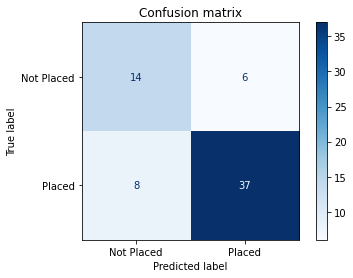

In [60]:
pp.print_pretty_confusionMatrix(clf_tree, np.unique(y), X_test, y_test)

Aquí vemos como se ha comportado el model; tenemos 37 que ha clasificado como Placed cuando si eran Placed, pero ha clasiicado 6 como Placed cuando realmente eran Not Placed. Por otro lado, ha predecido bien 14 como Not Placed pero se ha equivocado con 8 que si eran Placed. 

Podemos pintar el arbol para su interpretación:

In [61]:
#pp.print_decisionTree_colour(clf_tree, list(X.columns), 'status')

In [62]:
##pp.print_decisionTree_text(clf_tree, list(X.columns))

#### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

Random forest usa una tecnica de 'ensamble' llamada 'bagging'; genera multiples arboles de decisiones y en cada uno elige un numero aleatorio de variables.  

Además realiza boostraping para la selección de la muestra en cada árbol de decisión, la predicción final se realiza con la media de las predicciones de los árboles.

 En resumen, de forma aleatoria selecciona data points y variables y crea multiples árboles de decisión.  Como consecuencia es más robusto que un único árbol, aunque eso no garantiza una mejor performance.

In [64]:
clf_rand = RandomForestClassifier(random_state=0)
clf_rand.fit(X_train, y_train)
y_pred = clf_rand.predict(X_test)
accuracy_score(y_test, y_pred)

0.8461538461538461

La performance es mejor que con el decision tree, subiendo hasta un 84%.

In [65]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

  Not Placed       0.65      0.81      0.72        16
      Placed       0.93      0.86      0.89        49

    accuracy                           0.85        65
   macro avg       0.79      0.83      0.81        65
weighted avg       0.86      0.85      0.85        65



Vemos que al igual con el decision tree, el modelo se comporta mejor con los Placed que con los Not Placed. Sobretodo en este caso con la precisión, será importante tener esto en cuenta si sucede igual con el resto de modelos.

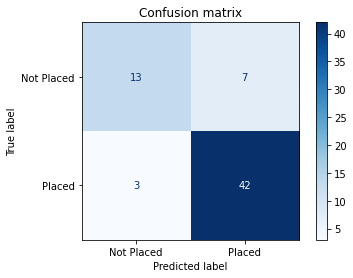

In [66]:
pp.print_pretty_confusionMatrix(clf_rand, np.unique(y), X_test, y_test)

Aquí vemos como el modelo ha mejorado la actuación del anterior en los casos Placed (suben los true positives), sin embargo, no mejora para los false positive. 

#### SVM 

In [67]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Para realizar un supor vector machine es mejor escalar las variables, ya que el hiperplano óptimo estará influenciado por la escala de las variables. Además, SVM no trabaja con variables categoricas como los decision tree y es necesario crear dummies.

In [112]:
data_clf_dummies = pd.get_dummies(data_clf, drop_first=True)

Ahora, igual que antes, separamos en X e y:

In [113]:
X, y = data_clf_dummies.drop('status_Placed',axis=1), data_clf_dummies.loc[:,'status_Placed']

In [114]:
X.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,1,0,0,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,1,0,0,1,0,0,0,0,0


Aquí vemos como la escala de las variables es diferente, mientras las notas esan en escala 0-100, las dummies tienen valor 0-1.

El preprocesado con `MinMaxScaler` deja las variables dummy como 0-1.

In [115]:
X_scaled = MinMaxScaler().fit_transform(X)
pd.DataFrame(X_scaled).head() #Para mostrar el resultado

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.538240,0.889621,0.195122,0.104167,0.284483,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.792414,0.680890,0.670244,0.760417,0.564843,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.497011,0.510708,0.341463,0.520833,0.247001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.311482,0.247117,0.048780,0.333333,0.308096,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.925788,0.602965,0.568293,0.975000,0.160795,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Hacemos la separacion entre train y test:

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3,random_state=0, stratify=y)

Entrenamos y predecimos con el modelo primero con el kernel lineal y despues el Gausianno.

In [73]:
clf_svm = SVC(kernel = 'linear')
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.8769230769230769

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.88      0.96      0.91        45

    accuracy                           0.88        65
   macro avg       0.88      0.83      0.85        65
weighted avg       0.88      0.88      0.87        65



Vemos que el accuracy del modelo es 87%, en el cuadro vemos muy buena precision con los Placed, pero si siendo dificil identificar los Not Placed.

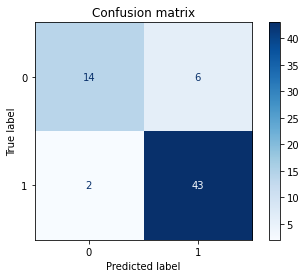

In [75]:
pp.print_pretty_confusionMatrix(clf_svm, np.unique(y), X_test, y_test)

Como hemos dicho, mejora en los true positive, pero sigue dando los mismo resultados con los false positives.

Ahora vamos a probar el mismo modelo pero con el kernel gaussiano, además vamos a implementar una búsqueda de los mejores parámetros dentro de un rango, tratanto de buscar el mejor modelo.

In [76]:
from sklearn.model_selection import GridSearchCV
clf_svm = SVC().fit(X_train, y_train) 
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(clf_svm, param_grid, cv=3)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 50, 'gamma': 0.005}


In [77]:
model = grid.best_estimator_
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8615384615384616

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.88      0.93      0.90        45

    accuracy                           0.86        65
   macro avg       0.85      0.82      0.83        65
weighted avg       0.86      0.86      0.86        65



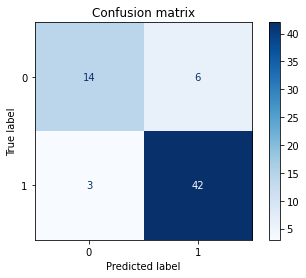

In [79]:
pp.print_pretty_confusionMatrix(model, np.unique(y), X_test, y_test)

Usando el kernel gaussiano y la optimizacion del modelo nos conduce a unas conclusiones parecidas. Todos los modelos hasta ahora parecen identificar bien los Placed, pero su precision es menor con los Not Placed.

Niguno de los modelos hasta ahora consigue bajar de 6 los false positive.

#### Clasificadores Bayesianos

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
clf_bayes = GaussianNB()
clf_bayes.fit(X_train, y_train)
y_pred = clf_bayes.predict(X_test)
accuracy_score(y_test, y_pred)

0.7538461538461538

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.82      0.82      0.82        45

    accuracy                           0.75        65
   macro avg       0.71      0.71      0.71        65
weighted avg       0.75      0.75      0.75        65



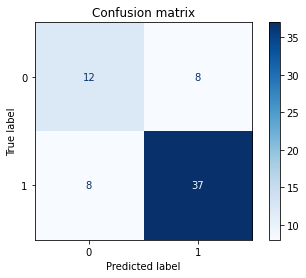

In [83]:
pp.print_pretty_confusionMatrix(clf_bayes, np.unique(y), X_test, y_test)

El modelo basado en teorema de Bayes da peores resultados que los anteriores. 

#### Bagging

In [84]:
from sklearn.ensemble import BaggingClassifier

Es importante tener en cuenta que todos los modelos se han entrenador con el mismo set de train y test, con otras reparticiones diferntes los modelos podrían dar resultados diferentes. En concordancia con esta idea, vamos a implementar técnicas de 'ensamble' con los modelos, dónde los set de train y test variaran.

Un clasificador 'Bagging' ajusta un modelo con diferentes submuestras del muestreo original y despues agrega todas las predicciones, ya bien sea con una media o por votaciones.

De esta manera nuestro clasificador es más robusto, y evitamos el riesgo de hacer overfitting sobre los datos de entrenamiento.

Vamos a probar este método con el SVM y con el clasificador Gaussiano; no lo usamos con el decision tree debido a que el random forest hace algo parecido. 

In [85]:
svm_bagging = BaggingClassifier(SVC(kernel='linear'), random_state = 0, n_jobs = -1, warm_start=True)
svm_bagging.fit(X_scaled, y)
svm_bagging.score(X_scaled, y)

0.8976744186046511

In [86]:
svm_bagging = BaggingClassifier(SVC(C=50, gamma = 0.005), random_state = 0, n_jobs = -1, warm_start=True)
svm_bagging.fit(X_scaled, y)
svm_bagging.score(X_scaled, y)

0.9116279069767442

Hemos usado los dos kernel que vimos antes con el SVM; los resultados son mejores. Aunque él mismo hacer train y test y calcula el accuracy, vamos a generar un modelo pasándole un train y test para visualizar la matriz de confusión y entender como esta actuando el modelo. 

In [87]:
svm_bagging = BaggingClassifier(SVC(C=50, gamma = 0.005), random_state = 0, n_jobs = -1, warm_start=True)
svm_bagging.fit(X_train, y_train)
svm_bagging.score(X_train, y_train)

0.9

Hacemos unas predicciones y testeamos los resultados

In [88]:
y_pred = svm_bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.8923076923076924

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.88      0.98      0.93        45

    accuracy                           0.89        65
   macro avg       0.91      0.84      0.86        65
weighted avg       0.90      0.89      0.89        65



Vemos que mejora en la precicion del Not Placed, pero no consigue aumentar el recall, resultamos parecidos al resto de modelos. Veamos en la matriz de confusión:

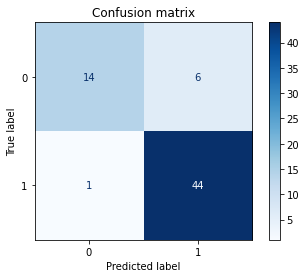

In [90]:
pp.print_pretty_confusionMatrix(svm_bagging, np.unique(y), X_test, y_test)

En efecto, el modelo mejora aún más las true positive, pero sigue sin poder clasificar bien esos 6 false positive. Todo parece indicar, que esos 6 alumnos representar outliers y ninguno de los modelos podrá clasificarlos correctamente. Esto es bueno, evitamos que el modelo se sobreentrene.  

In [91]:
Gauss_bagging = BaggingClassifier(GaussianNB(), random_state = 0, n_jobs = -1, warm_start=True)
Gauss_bagging.fit(X_scaled, y)
Gauss_bagging.score(X_scaled, y)

0.8465116279069768

In [92]:
Gauss_bagging = BaggingClassifier(GaussianNB(), random_state = 0, n_jobs = -1, warm_start=True)
Gauss_bagging.fit(X_train, y_train)
y_pred =  Gauss_bagging.predict(X_test)
accuracy_score(y_test, y_pred)

0.7692307692307693

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        20
           1       0.80      0.89      0.84        45

    accuracy                           0.77        65
   macro avg       0.73      0.69      0.71        65
weighted avg       0.76      0.77      0.76        65



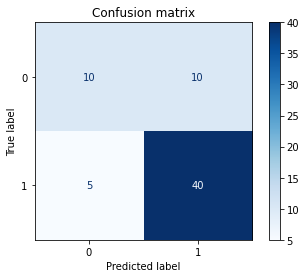

In [94]:
pp.print_pretty_confusionMatrix(Gauss_bagging, np.unique(y), X_test, y_test)

Algo a tener en cuenta es la diferencia entre el accuracy del modelo la muestra completa, y el modelo con la particion train/test que parece indicar que la partición aleatoria `random_state = 0` en el split no optimiza el comportamiento del clasificador gaussiano. Por ese motivo es bueno usar el bagging con la muestra completa; así el modelo puede entrenar con varias submuestras y no condiciona su comportamiento a una única partición. 

En concordancia con lo dicho, el modelo Gaussiano con este dataset tiene un accuracy medio de 85% y no el 75% que veiamos antes. Simplemente se puede dar la casualidad de que una partición train/test en concreto le beneficie a un modelo u a otro. 

Después de ver y comparar todos los modelos propuesto, vemos que el que mejor accuracy ha tenido a sido el SVM con un kernel gaussiano (además de optimizar su parámetros y realizar bagging). Lo cual no es de estrañar del todo ya que muchas de las variables finalmente escogidas veíamos en el analisis exploratorio inicial que tenian distribuciones Gaussianas. 

![Error al cargar la imagen](imagenes/distgauss.png) 

También cabe recordar esos false positive que ninguno de los modelos ha sido capaz de clasificar. Como ya hemos comentado anteriormente lo más probable es que se deban a outliers y es bueno entonces que el modelo no los clasifique correctamente. Un análisis más exaustivo de esos outliers en concreto podría ser conveniente aquí.

### Problema de Regresión: Estimar el salario

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import pearsonr

Para el análisis de regresión cambiamos de variable objetivo. Además, recordamos que para los alumnos que no obtuvieron plaza su salario aparecia como `Nan`.   

Para seguir con el análisis, por lo tanto, habrá que prescindir de aquellos alumnos que no obtuvieron plaza, y realizar la regresión con los que si la obtuvieron y por lo tanto recibieron un salario (oferta de).

In [132]:
data_reg = dataframe.dropna().drop('status', axis = 1)

In [97]:
data_reg.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,252000.0


Como hemos visto antes, existen outliers. Para normalizar un poco la distribución del salario vamos a eliminar esos outliers, ya que es poco probable obtener esas ofertas de salario. 

In [98]:
q = np.quantile(data_reg['salary'], 0.95)
q

423250.00000000006

Si calculamos el percentil, vemos que el 95% de la población se encuentra por debajo de 423.25k. Por lo tanto, vamos a eliminar del dataset esos valores extremos que se encuentre por encima de dicho salario. 

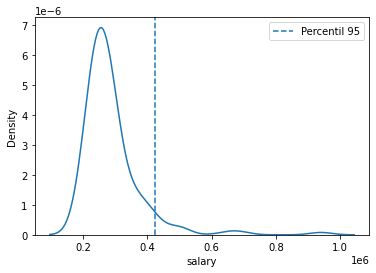

In [99]:
sns.kdeplot('salary', data = data_reg)
plt.axvline(q, ls = '--',label = 'Percentil 95')
plt.legend(loc=0);

In [133]:
reg_norm = data_reg[data_reg['salary']<q].reset_index().drop('index', axis = 1)

<AxesSubplot:xlabel='salary', ylabel='Density'>

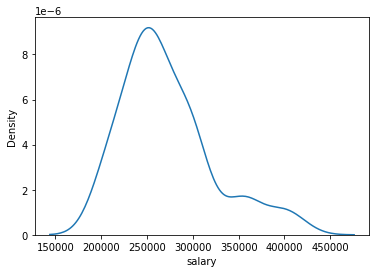

In [101]:
sns.kdeplot('salary', data = reg_norm)

En este gráfico se puede observar, como la distribución se asemeja más a una distribución normal. 

Otra buena implementación, sobretodo con variables monetarias, es calcular el logaritmo. Esto reduce aún más el efecto que tienen los valores extremos en los resultados y facilita la interpretación en la regresión; podemos pasar a hablar de aumentos porcentuales en vez de aumentos unitarios (lo cual tiene sentido si hablamos de variables monetarias).

In [134]:
reg_norm['Log_salary'] = np.log(reg_norm['salary'])

<AxesSubplot:xlabel='Log_salary', ylabel='Density'>

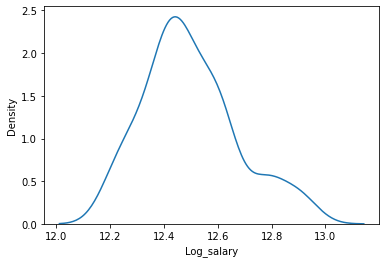

In [103]:
sns.kdeplot('Log_salary', data = reg_norm)

Separamos las variables independientes, de la variable dependiente: 

Un paso previo será, pasar de variables categóricas a variables dummy, ya que la regresión ha de hacerse con variables numéricas. Aunque en el análisis exploratorio encontramos relevantes únicamente las variables: el género `gender`, el tipo de grado `degree_t` y la especialización en la educación secundaria `hsc_s`, vamos a calcular el coeficiente de Pearson de todas las variables con el salario, para ver si existe alguna correlación que no se pudo distinguir en el análisis visual:

In [104]:
reg_norm_dummies = pd.get_dummies(reg_norm)
for variable in reg_norm_dummies.columns:
    pearson = pearsonr(reg_norm_dummies[variable], reg_norm_dummies['Log_salary'])
    if variable not in ['salary','Log_salary']:
        print(variable , ':' , pearson )

ssc_p : (0.16803528215704733, 0.0471968684165342)
hsc_p : (0.10983717169205436, 0.19640155215474323)
degree_p : (0.059648512832375544, 0.4838855578677323)
etest_p : (0.2483055165135936, 0.003095192222653207)
mba_p : (0.20228851370908818, 0.016535080123210154)
gender_F : (-0.20370575274458536, 0.01577680841726472)
gender_M : (0.20370575274458536, 0.01577680841726472)
ssc_b_Central : (-0.09405364887890381, 0.26901544160785656)
ssc_b_Others : (0.09405364887890381, 0.26901544160785656)
hsc_b_Central : (-0.058861320514863404, 0.4896838380209357)
hsc_b_Others : (0.05886132051486339, 0.4896838380209357)
hsc_s_Arts : (-0.09460511313422341, 0.26620575823236814)
hsc_s_Commerce : (0.009206088042332418, 0.9140325014677902)
hsc_s_Science : (0.029587473975354002, 0.7285755083943442)
degree_t_Comm&Mgmt : (-0.1631755082489952, 0.05406188172581481)
degree_t_Others : (0.03815014000092128, 0.6545036040584992)
degree_t_Sci&Tech : (0.15370255443814973, 0.06981363575636369)
workex_No : (-0.03095281446364212

Como vemos ya habiamos intuido con el análisis inicial, no existen correlaciones fuertes entre las variables explicativas y el salario. Para realizar un buen análisis será conveniente unas correlaciones cercanas o superiores a 0.7. Sin embargo, ninguna variable supera el 0.3.

Si realizamos la regresión, podroemos ver si alguna de las variables es significativa al 95%, teniendo en cuenta un p-valor < 0.05:

In [135]:
reg_data = pd.get_dummies(reg_norm, drop_first= True).drop('salary', axis = 1)

Es importante `drop_first = True` ya que sino se introduciría multicolinealidad en el modelo. 

In [136]:
reg_data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,Log_salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.00,58.80,12.506177,1,1,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.50,66.28,12.206073,1,0,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.00,57.80,12.429216,1,0,0,0,0,0,0,0,0
3,82.00,64.00,66.00,67.00,62.14,12.437184,1,0,0,0,1,0,1,1,0
4,73.00,79.00,72.00,91.34,61.29,12.350173,1,0,0,1,0,0,0,0,0


Separamos entre variables explicativas `X` y variable explicada `y`:

In [137]:
X, y = reg_data.drop('Log_salary', axis = 1), reg_data.loc[:,'Log_salary']

Primero con la libreria `scikit learn`:

In [108]:
model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(X, y)
y_pred = model.predict(X)
r2_score(y, y_pred)

0.1773584399025655

La libreria `statsmodels` nos permite ver algunos estadísticos más

In [109]:
x = sm.add_constant(X) 
ols = sm.OLS(y, x)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_salary   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1.925
Date:                Sun, 02 May 2021   Prob (F-statistic):             0.0296
Time:                        20:01:44   Log-Likelihood:                 59.758
No. Observations:                 140   AIC:                            -89.52
Df Residuals:                     125   BIC:                            -45.39
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.8553      0.215     55.097      0.000      11.429      12.281
ssc_p                     0.0013      0.002      0.593      0.554      -0.003       0.006
hsc_p                    -0.0010      0.002     -0.486      0.628      -0.005       0.003
degree_p                 -0.0016      0.003     -0.593      0.554      -0.007       0.004
etest_p                   0.0017      0.001      1.412      0.160      -0.001       0.004
mba_p                     0.0072      0.003      2.174      0.032       0.001       0.014
gender_M                  0.0895      0.034      2.662      0.009       0.023       0.156
ssc_b_Others              0.0082      0.041      0.201      0.841      -0.072       0.089
hsc_b_Others              0.0046      0.040      0.115      0.909      -0.074       0.083
hsc_s_Commerce            0.1029      0.081      1.273      0.205      -0.057       0.263
hsc_s_Science             0.0466      0.087      0.533      0.595      -0.126       0.220
degree_t_Others           0.1448      0.088      1.638      0.104      -0.030       0.320
degree_t_Sci&Tech         0.0794      0.047      1.686      0.094      -0.014       0.173
workex_Yes               -0.0249      0.031     -0.797      0.427      -0.087       0.037
specialisation_Mkt&HR    -0.0007      0.032     -0.021      0.983      -0.065       0.063
==============================================================================
Omnibus:                        2.472   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.321
Skew:                           0.315   Prob(JB):                        0.313
Kurtosis:                       2.963   Cond. No.                     2.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que el modelo es muy pobre, únicamente logra explicar un 17% de la variación en el salario. Además, solamente el género y la nota del MBA son significativs al 5%. 

Vamos a especificar un modelo más simple, con únicamente esos dos parámetros:

In [110]:
X = reg_data[['gender_M', 'mba_p']]
x = sm.add_constant(X) 
ols = sm.OLS(y, x)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log_salary   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     8.349
Date:                Sun, 02 May 2021   Prob (F-statistic):           0.000379
Time:                        20:01:44   Log-Likelihood:                 54.142
No. Observations:                 140   AIC:                            -102.3
Df Residuals:                     137   BIC:                            -93.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9379      0.161     74.377      0.000      11.621      12.255
gender_M       0.0989      0.031      3.226      0.002       0.038       0.159
mba_p          0.0079      0.002      3.212      0.002       0.003       0.013
==============================================================================
Omnibus:                        4.828   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.661
Skew:                           0.447   Prob(JB):                       0.0972
Kurtosis:                       3.013   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conlcuimos que la regresión lineal no representa el conjuntos de datos. Además del bajo coeficiente del $R^2$, muchos de los supuesto no se están cumpliendo. El estadístico de Jarque-Bera debería tener un valor cercano a 0 y una probabilidad cercana a 1, sin embargo los valores son `4.661` y `0.0972` respectivamente. Sí que se cumple el supuesto de varianza constante (homocedasticidad) ya que el estadítico de Durbin-Watson se encuentra entre los valores 1.5 y 2.5. Pero, por último, nos encontramos ante multicolinealidad `Cond. No. = 719`.

Algo que si podemos destacar, es que el modelo predice un 10% de diferencia entre los salarios ofrecidos a los hombres frente a las mujeres. 

Para mejorar el modelo, se necesitarían mas datos, o mejor, más variables explicativas ya que como vimos en el análisis exploratorio, el salario parecía ser ofrecido de forma aleatoria. Seguramente otras variables que no se están viendo representadas en el dataset explicarian mejor su variabilidad. 

Ya que el el salario no parece explicarse cn la regresión lineal múltiple y teniendo en cuenta la buena performance de los modelos clasificadores, vamos a ver si actuan de igual forma  como regresores. Para ello, usaremos Support Vector Machine en su versión como regresor `SVR` y un Random Forest, también en su versión como regresor `RandomForestRegressor`. 

Con los SVM, utilizaremos el método 'Bagging' igual que vimos en clasificación por medio de `BaggingRegresor` para obtener unas predicciones más robustas. Cómo metricas utilizaremos el error cuadrático medio y el error absoluto medio. El error cuadrático es más sensible a errores grandes, y el error absoluto nos permite una mejor interpretación. 

Tras probar con ambos modelos, SVM y Random Forest, únicamente vamos a mostrar los resultados del último ya que el SVR tenia resultados bastante malos y por el contrario, como veremos ahora, el Random Forest se ajusta bien a los datos. 

In [320]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [331]:
rand_forest = RandomForestRegressor(criterion='mse', n_jobs=-1, random_state=0, warm_start=True)
rand_forest.fit(X, y)
y_pred_forest = rand_forest.predict(X)
print('Error medio absoluto:',mean_absolute_error(y, y_pred_forest))
print('Error cuadrático medio:',mean_squared_error(y, y_pred_forest))

Error medio absoluto: 0.047718052863095044
Error cuadrático medio: 0.003999002644698412


Aquí observamos la buena actuación del modelo. Ambos errores son cercanos a su valor óptimo (0). Como ya habiamos eliminado los outliers del modelo no hay errores de gran magnitud y eso explica el bajo valor del error cuadrático. De media, nuestro modelo, se desvía un 4.77% de su valor real. 

Podemos ver representada la distribución de las predicciones y los valores reales, así visualizamos la buena performance del modelo. 

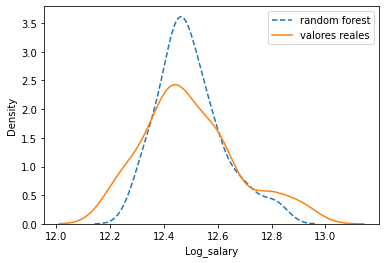

In [332]:
sns.kdeplot(y_pred_forest, label = 'random forest', ls = '--')
sns.kdeplot(y, label = 'valores reales')
plt.legend();

Para ver esta misma distribución, pero con el salario en vez de su logaritmo, simplemente elevamos el número $e$ al valor logarítmico. 

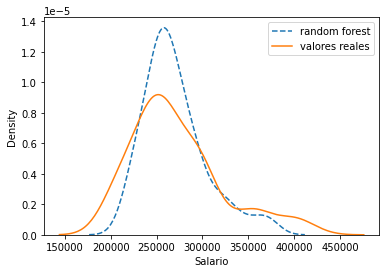

In [333]:
sns.kdeplot(np.e ** y_pred_forest, label = 'random forest', ls = '--')
sns.kdeplot(np.e ** y, label = 'valores reales')
plt.xlabel('Salario')
plt.legend();

Vamos a visualizar una pequeña tabla con los valores reales y sus predicciones por el modelo:

In [345]:
data = {'Predicciones':np.e**y_pred_forest, 'Valores Reales':np.e**y, 'Diferencia':np.e**y_pred_forest-np.e**y}
pd.DataFrame(data)

,Predicciones,Valores Reales,Diferencia
0,266288.818984,270000.0,-3711.181016
1,224902.628553,200000.0,24902.628553
2,256655.858180,250000.0,6655.858180
3,261267.646151,252000.0,9267.646151
4,249378.552127,231000.0,18378.552127
...,...,...,...
135,225300.356463,216000.0,9300.356463
136,372547.755294,400000.0,-27452.244706
137,270909.339589,275000.0,-4090.660411
138,277846.041019,295000.0,-17153.958981
